In [143]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sympy import *
from sympy.abc import *

init_printing()

In [144]:
# 単位ベクトルとか角度の定義
angles = symbols("phi_0 phi_1 phi_2")# 原点から肩部への方向を表す角度
thetas = symbols("theta_0 theta_1 theta_2")# モーターの角度(±90deg)
unit_vectors = [Matrix([sin(angles[i]),cos(angles[i]),0]) for i in range(3)]
ez = Matrix([0,0,1])

In [182]:
# パラメータ(実数)
params = [(A,130.0),(B,200.0),(C,400.0),(D,130.0)]
params.append((angles[0],2.0*np.pi/3.0*0))
params.append((angles[1],2.0*np.pi/3.0*1))
params.append((angles[2],2.0*np.pi/3.0*2))
params.append((x,0))
params.append((y,0))
params.append((z,400))

In [146]:
# 各座標の計算
A_vectors = map(lambda x: A*x,unit_vectors)
B_vectors = [A_vectors[i] + B*(unit_vectors[i] * cos(thetas[i])-ez*sin(thetas[i]) ) for i in range(3)]
D_vector = Matrix([x,y,z])
C_vectors = [D_vector + D * unit_vectors[i] for i in range(3)]

In [147]:
# モーターのある位置の座標．肩っぽい部分の座標．
A_vectors

⎡⎡A⋅sin(φ₀)⎤, ⎡A⋅sin(φ₁)⎤, ⎡A⋅sin(φ₂)⎤⎤
⎢⎢         ⎥  ⎢         ⎥  ⎢         ⎥⎥
⎢⎢A⋅cos(φ₀)⎥  ⎢A⋅cos(φ₁)⎥  ⎢A⋅cos(φ₂)⎥⎥
⎢⎢         ⎥  ⎢         ⎥  ⎢         ⎥⎥
⎣⎣    0    ⎦  ⎣    0    ⎦  ⎣    0    ⎦⎦

In [148]:
# 腕の中央の関節．肘っぽい部分の座標
B_vectors

⎡⎡A⋅sin(φ₀) + B⋅sin(φ₀)⋅cos(θ₀)⎤, ⎡A⋅sin(φ₁) + B⋅sin(φ₁)⋅cos(θ₁)⎤, ⎡A⋅sin(φ₂) 
⎢⎢                             ⎥  ⎢                             ⎥  ⎢          
⎢⎢A⋅cos(φ₀) + B⋅cos(φ₀)⋅cos(θ₀)⎥  ⎢A⋅cos(φ₁) + B⋅cos(φ₁)⋅cos(θ₁)⎥  ⎢A⋅cos(φ₂) 
⎢⎢                             ⎥  ⎢                             ⎥  ⎢          
⎣⎣         -B⋅sin(θ₀)          ⎦  ⎣         -B⋅sin(θ₁)          ⎦  ⎣         -

+ B⋅sin(φ₂)⋅cos(θ₂)⎤⎤
                   ⎥⎥
+ B⋅cos(φ₂)⋅cos(θ₂)⎥⎥
                   ⎥⎥
B⋅sin(θ₂)          ⎦⎦

In [149]:
# 下部の接続部分の座標．手首みたいな場所，
C_vectors

⎡⎡D⋅sin(φ₀) + x⎤, ⎡D⋅sin(φ₁) + x⎤, ⎡D⋅sin(φ₂) + x⎤⎤
⎢⎢             ⎥  ⎢             ⎥  ⎢             ⎥⎥
⎢⎢D⋅cos(φ₀) + y⎥  ⎢D⋅cos(φ₁) + y⎥  ⎢D⋅cos(φ₂) + y⎥⎥
⎢⎢             ⎥  ⎢             ⎥  ⎢             ⎥⎥
⎣⎣      z      ⎦  ⎣      z      ⎦  ⎣      z      ⎦⎦

In [150]:
# 下部の中央部分の座標．
D_vector

⎡x⎤
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [151]:
def norm2(x):
    """ 3次元ベクトルxのノルムの2乗を計算する関数 """
    return x[0]*x[0]+x[1]*x[1]+x[2]*x[2]

In [152]:
# 肘部分と手首の距離はCとして定義していることから
# (C_vectors[0] - Bvectors[0]).norm() - C == 0 となります
# ただ標準のnormではうまく計算ができなかったので自作した関数を用いてノルム(の2乗)を計算します
eq0 = C**2-norm2((C_vectors[0] - B_vectors[0]))
eq0 = expand(eq0)
eq0 = simplify(eq0)
eq0

In [153]:
# 先に P + Q * sin(theta_0) + R * cos(theta_0) = 0 の方程式を考える
formula = Eq(P + Q * sin(thetas[0]) + R * cos(thetas[0]),0)
formula

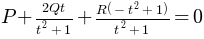

In [154]:
# t = tan(theta_0/2) を代入
formula = simplify(formula.subs([(thetas[0],2*atan(t))]))
formula

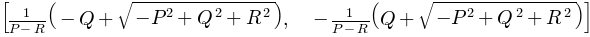

In [161]:
# tについての方程式として解く
t_ans = solve(formula,t)
t_ans

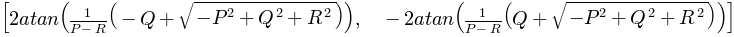

In [162]:
# thetaについての解はこうなる
theta_ans = [2*atan(val) for val in t_ans]
theta_ans

In [163]:
# P + Q*sin(theta_0) + R*cos(theta_0) = 0 の形を取り出す
Q_dash = eq0.coeff(sin(thetas[0]),1)
R_dash = eq0.coeff(cos(thetas[0]),1)
P_dash = eq0.coeff(cos(thetas[0]),0) - Q_dash * sin(thetas[0])

# P + Q*sin(thetas[0])+R*cos(thetas[0])が上のeq0と同じものであるか確認
simplify(expand(P_dash + Q_dash*sin(thetas[0])+R_dash*cos(thetas[0]))) 

In [166]:
P_dash

In [167]:
Q_dash

In [168]:
R_dash

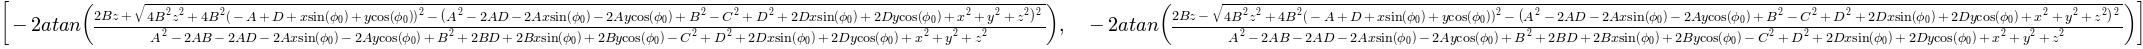

In [165]:
# theta_0の解
theta_ans = map( lambda val: simplify(val.subs([(P,P_dash),(Q,Q_dash),(R,R_dash)])),theta_ans)
theta_ans

In [197]:
# サンプル．
map(lambda x: x.subs(params)*180/np.pi+360,theta_ans)

In [193]:
atan(-1j+5).evalf()*180/np.pi

In [195]:
tan(-165*pi/180).evalf()